<a href="https://colab.research.google.com/github/kundan2403/ml-algo/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML clustring algo

# K-Means
Clustering is one of the most widely used unsupervised machine learning algorithms for partitioning a dataset into groups, or clusters, based on similarity.

Initialization:

1. Choose the number of clusters  K you want to
   partition the dataset into.
   
2. Randomly initialize  K centroids, which are points
   that represent the center of each cluster. These centroids can be randomly selected from the dataset or initialized in any other way.







Assign Points to Clusters

1. For each data point in the dataset, calculate its distance to each centroid. The distance measure commonly used is the Euclidean distance, although other distance measures can be used as well.

2. Assign each data point to the cluster whose centroid is closest (i.e., has the smallest distance).  



 Update Centroids

1.  After assigning all data points to clusters,  
    update the centroids of each cluster.
2. Compute the mean of all data points assigned to each cluster. This mean becomes the new centroid of the cluster.  



Repeat

Repeat steps 2 and 3 until convergence criteria are met. Common convergence criteria include
1. Centroids do not change significantly between iterations.   
2. Maximum number of iterations is reached.



Convergence

1. Convergence occurs when the centroids stabilize, i.e., when they stop changing significantly between iterations. At this point, the algorithm has reached a stable configuration, and the clusters have been formed.



Final Result

1. After convergence, the algorithm has partitioned the dataset into
   K clusters, and each data point belongs to exactly one cluster.

2. The centroids represent the center of each cluster and can be used for
   further analysis or interpretation of the clusters.




[[5.006      3.418      1.464      0.244     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


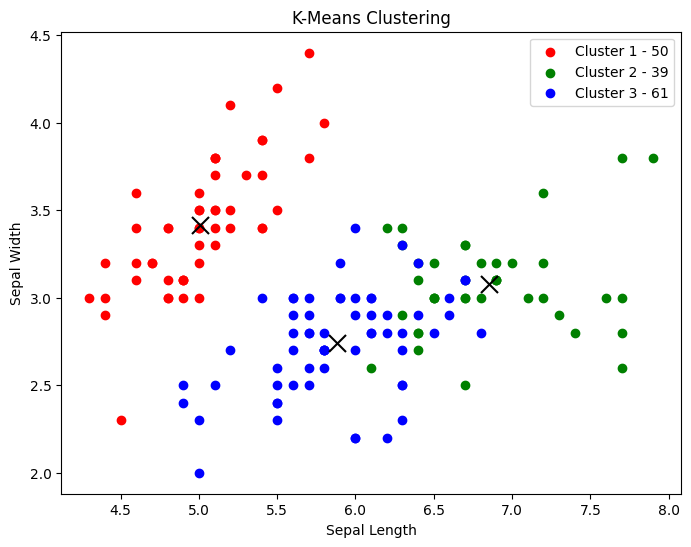

K-Means SSE: 78.94506582597731


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv("/content/data/Iris.csv")
X = iris_df.iloc[:, 1:-1].values  # Features
y = iris_df.iloc[:, 1:-1].values   # Target

# Number of clusters
k = 3

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    centroids = []
    for _ in range(k):
        centroid = data[np.random.choice(range(len(data)))]
        centroids.append(centroid)
    return np.array(centroids)

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Function to update centroids based on the mean of data points in each cluster
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# K-Means algorithm
def k_means(data, k):
    centroids = initialize_centroids(data, k)
    iter = 0
    converged = False
    sse = 0

    while not converged:
        iter += 1
        old_centroids = centroids.copy()

        # Assign data points to the nearest centroid
        clusters = assign_clusters(data, centroids)

        # Update centroids based on the mean of data points in each cluster
        centroids = update_centroids(data, clusters, k)

        # Check for convergence
        converged = np.array_equal(old_centroids, centroids)

    # Calculate SSE
    for i in range(k):
        cluster_points = data[clusters == i]
        sse += np.sum((cluster_points - centroids[i])**2)

    return clusters, centroids, sse

# Run K-Means clustering
kmeans_clusters, kmeans_centroids, kmeans_sse = k_means(X, k)

print(kmeans_centroids)

# Plot K-Means clusters
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_points = X[kmeans_clusters == i]
    _, counts = np.unique(kmeans_clusters, return_counts=True)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1} - { counts[i] }')
    plt.scatter(kmeans_centroids[i, 0], kmeans_centroids[i, 1], marker='x', color='black', s=150)
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
print("K-Means SSE:", kmeans_sse)



# K-medoid

Initialization:

1. Choose the number of clusters K you want to partition the dataset into.

2. Select k random points from the dataset. First, the algorithm selects k
   random points from the dataset as the initial medoids. The medoids that are chosen are used to define the initial k clusters.

Assign Points to Clusters

1. Assign data points to the cluster of the nearest
   medoid. It then assigns each non-medoid to the cluster that has the closest medoid.

2.  Calculate the total sum of distances of data  
    points from their assigned medoids for each medoid.
    It then calculates the cost, i.e., the total sum of distances or dissimilarities of the data points from the assigned medoid.

Update Medoid

1. Swap a non-medoid point with a medoid point and recalculate the cost. It then swaps every non-medoid point with the medoid assigned to it and recalculates the total sum of distances.

2. Undo the swap if the recalculated cost with the new medoid exceeds the previous cost. Finally, it evaluates whether the recalculated cost is more than the previously calculated cost. If this is the case, it undoes the swap, and the algorithm converges. If the recalculated cost is less, it repeats step 4

[[5.7 2.8 4.1 1.3]
 [5.  3.4 1.5 0.2]
 [6.5 3.  5.2 2. ]]


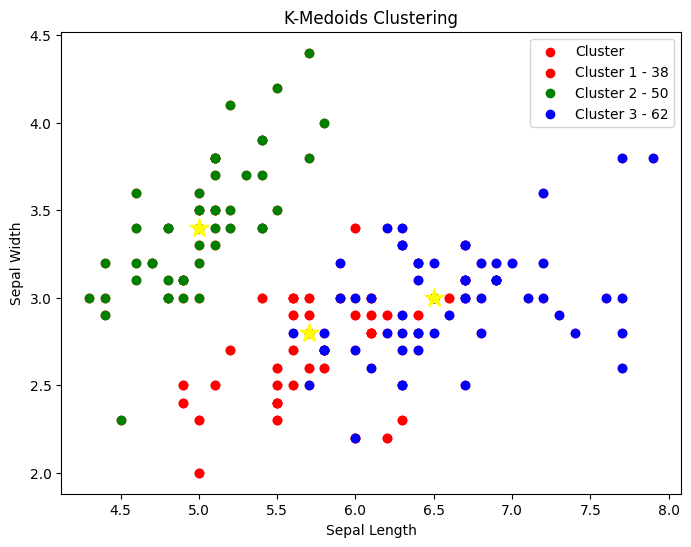

K - Medoids_sse SSE: 88.44


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv("/content/data/Iris.csv")
X = iris_df.iloc[:, 1:-1].values  # Features
iris_df.head()

#Number of cluster
K = 3

# Function to initialize centroids randomly
def initialize_medoids(data, k):
  medoids = []
  for _ in range(k):
    medoid = data[np.random.choice(range(len(data)))]
    medoids.append(medoid)

  return medoids;

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def assign_clusters(data, medoids):
  clusters = []
  for point in data:
    distance = [euclidean_distance(point, medoid) for medoid in medoids]
    cluster = np.argmin(distance)
    clusters.append(cluster)
  return np.array(clusters)

def update_medoids(data, clusters, k, medoids):
  n_features = data.shape[1]
  medoids = np.zeros((k, n_features))
  for i in range(k):
      cluster_points = data[clusters == i]
      cluster_distances = np.zeros(len(cluster_points))
      for j, point in enumerate(cluster_points):
          cluster_distances[j] = np.sum([euclidean_distance(point, point2) for point2 in cluster_points])
      min_index = np.argmin(cluster_distances)
      medoids[i] = cluster_points[min_index]
  return medoids

def k_medoids(data, k):
  medoids = initialize_medoids(data, k)
  coverage = False
  itr = 0
  sse = 0
  while not coverage:
    itr += 1
    old_medoids = medoids.copy()
    clusters = assign_clusters(data, medoids)
    medoids = update_medoids(data, clusters, k, medoids)
    coverage = np.array_equal(old_medoids, medoids)

  for i in range(k):
        cluster_points = data[clusters == i]
        sse += np.sum((cluster_points - medoids[i])**2)

  return clusters, medoids, sse

k_medoid_clusters, k_medoids, k_medoids_sse = k_medoids(X, K)
print(k_medoids)
colors = ['r', 'g', 'b']
plt.figure(figsize=(8, 6))

#ploting intitial data
plt.scatter(X[:, 0], X[:, 1], c='r', label=f'Cluster')
for i in range(K):
  cluster_points = X[k_medoid_clusters == i]
  _, counts = np.unique(k_medoid_clusters, return_counts=True)
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1} - { counts[i] }')
  plt.scatter(k_medoids[i, 0], k_medoids[i, 1], marker='*', color='yellow', s=200)

plt.title('K-Medoids Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
print("K - Medoids_sse SSE:", k_medoids_sse)

